# Exercício de Programação: Regressão Linear

***Autor*: Gabriel Negreiros Lima**

## Questão 1 - Regressão Linear com uma variável
Neste exercício, vamos implementar uma regressão linear com uma variável para prever o lucro que poderia ser obtido caso tenhamos decidido montar um food truck.

### 1) O problema
Suponha  que  você  seja  o  CEO  de  uma  franquia  de  restaurantes  e  esteja procurando por um lugar (cidade) para abrir uma nova loja (food truck). A rede já tem caminhões em várias cidades e você tem os dados sobre lucro 
e tamanho da população em cada uma delas. Você gostaria então de usar esses dados para ajudá-lo a selecionar qual deveria ser a próxima cidade a ser escolhida dentro do seu projeto de expansão da marca.

O arquivo “data1.txt” contém o conjunto de dados para o esse problema de regressão linear. A primeira coluna deste arquivo representa a população de uma cidade e a segunda coluna, por sua vez, o lucro de um food truck naquela cidade. Um valor negativo para o lucro indica uma perda. 

In [1]:
# Importação e amostra do dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_paths = ["data1.txt", "data1.txt"]
colums_food = ["population", "profit"]
df_food = pd.read_csv(data_paths[0], delimiter=",", header=None, names=colums_food)
df_food.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 2) Plotando os dados
Antes  de  iniciar  qualquer  tarefa,  muitas  vezes  é  útil  entender  os  dados visualizando-os. Para este conjunto de dados, iremos plotar um gráfico para visualizá-los, uma vez que ele possui apenas duas propriedades para traçar (lucro e população). (Muitos outros problemas que você encontrará na realidade são multidimensionais e não podem ser plotados em 2D.)

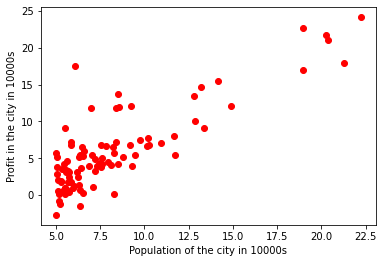

In [2]:
plt.xlabel("Population of the city in 10000s")
plt.ylabel("Profit in the city in 10000s")
plt.scatter(df_food[colums_food[0]], df_food[colums_food[1]], c="red")
plt.show()

### 3) Gradiente Descendente
Nesta  parte,  calcularemos  os  parâmetros  da  regressão  linear  e  a função custo para o conjunto de dados, utilizando uma taxa de aprendizado de 0,01.
- Plotaremos a função custo em relação ao número de iterações para ver o seu decaimento; 
- Depois que terminarmos de calcular os parâmetros da regressão, traçar o ajuste linear, conforme a figura indicada na documentação passada pelo professor

In [10]:
## Funcoes matematicas e auxiliares
# Definicao da funcao hipotese para um polinomio dado os valores das entradas X (vetor)
def h_function(coeffs, X):
    result = 0 
    
    #print(X)
    for index, coeff in enumerate(coeffs):
        if index == 0:
            result += coeff
        else:
            result += coeff * X
    
    return result

# Gera a reta
def evaluated_func(thetas):
    y_d = []
    
    for i, x_i in enumerate(df_food[colums_food[0]]):
        y_d.append(h_function(thetas, x_i))
    return y_d


In [14]:
## Define variáveis iniciais
# Funcao desejada y_d
y_d = [] 
thetas = np.array([0, 1])
num_epochs = 500
alpha = 0.01

thetas_epoch = []
costs_epoch = []

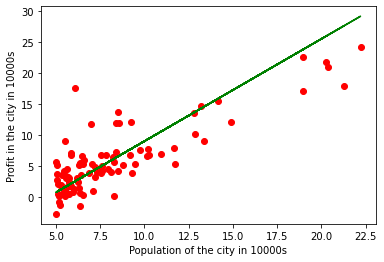

In [16]:
# Executa iterativamente
for i in range(num_epochs):
    thetas_epoch.append(thetas[0])
    

    y_d = evaluated_func(thetas)
    error = y_d - df_food[colums_food[1]]      
    cost = (error.sum() ** 2)/(2 * len(df_food[colums_food[1]]))
    costs_epoch.append(cost)

    temp = np.zeros(len(thetas))
    for j in range(0, len(y_d)):
        error_temp = (y_d[j] - df_food[colums_food[1]][j])
        for k, _ in enumerate(thetas):
            if k == 0:
                temp[k] += error_temp *  1
            else:
                temp[k] += error_temp *  df_food[colums_food[1]][j]
    thetas = thetas - alpha * (temp/len(df_food[colums_food[0]]))

fig = plt.figure()
plt.xlabel("Population of the city in 10000s")
plt.ylabel("Profit in the city in 10000s")
plt.scatter(df_food[colums_food[0]], df_food[colums_food[1]], c="red")
plt.plot(df_food[colums_food[0]], y_d, c="green")
plt.show()